In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
s_train = pd.read_csv('datasets/clean_train.csv')
s_test = pd.read_csv('datasets/clean_test.csv')

In [3]:
s_train['gr_liv_area'].isnull().sum()

0

In [4]:
s_train['overall_cond'].isnull().sum()

0

In [5]:
s_train['exter_qual'].isnull().sum()

0

In [6]:
s_train['garage_area'].isnull().sum()

0

In [7]:
s_train['garage_area'] = s_train['garage_area'].fillna(0)

In [8]:
s_train['garage_area'].isnull().sum()

0

In [9]:
#Trying out a very small model first. 
features = ['overall_qual', 'overall_cond', 'exter_qual', 'gr_liv_area', 'garage_area']
X = s_train[features]
y = s_train['saleprice']
X_test_data = s_test[features]
print(X.describe())
print(y.describe())

       overall_qual  overall_cond   exter_qual  gr_liv_area  garage_area
count   1986.000000   1986.000000  1986.000000  1986.000000  1986.000000
mean       6.059919      5.580564     2.616818  1468.120342   465.289023
std        1.337291      1.094435     0.557702   442.006556   206.647658
min        1.000000      1.000000     1.000000   438.000000     0.000000
25%        5.000000      5.000000     2.000000  1125.250000   315.250000
50%        6.000000      5.000000     3.000000  1432.000000   478.000000
75%        7.000000      6.000000     3.000000  1710.000000   576.000000
max       10.000000      9.000000     4.000000  2956.000000  1356.000000
count      1986.000000
mean     175450.263847
std       65798.980319
min       50138.000000
25%      129500.000000
50%      160000.000000
75%      210000.000000
max      398800.000000
Name: saleprice, dtype: float64


In [10]:
s_train[features].isnull().sum()

overall_qual    0
overall_cond    0
exter_qual      0
gr_liv_area     0
garage_area     0
dtype: int64

In [11]:
X.isnull().sum()

overall_qual    0
overall_cond    0
exter_qual      0
gr_liv_area     0
garage_area     0
dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=76)

In [13]:
# plt.figure(figsize=(15,15))
# sns.heatmap(s_train.corr(), annot=True)

In [14]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [15]:
X_scaled.shape

(1588, 5)

In [16]:
type(X_scaled)

numpy.ndarray

In [17]:
X_test_scaled.shape

(398, 5)

In [18]:
X_train.corr(),s_train['saleprice'].sort_values()

(              overall_qual  overall_cond  exter_qual  gr_liv_area  garage_area
 overall_qual      1.000000     -0.100212   -0.702511     0.528031     0.508792
 overall_cond     -0.100212      1.000000    0.154580    -0.144987    -0.155180
 exter_qual       -0.702511      0.154580    1.000000    -0.397822    -0.451884
 gr_liv_area       0.528031     -0.144987   -0.397822     1.000000     0.441395
 garage_area       0.508792     -0.155180   -0.451884     0.441395     1.000000,
 398      50138
 1947     51689
 1332     52000
 1890     52500
 679      55000
          ...  
 1700    392500
 1980    394617
 1713    395000
 1760    395039
 1674    398800
 Name: saleprice, Length: 1986, dtype: int64)

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
lr_scores = cross_val_score(lr, X_scaled, y_train, cv=3)
lr_scores.mean()

0.8014901128625364

In [22]:
lasso = LassoCV(n_alphas=30)

In [23]:
lasso.fit(X_scaled, y_train)

LassoCV(n_alphas=30)

In [24]:
lasso.alpha_

52.47454723437972

In [25]:
np.shape(lasso.coef_)

(5,)

In [26]:
lasso_scores = cross_val_score(lasso, X_test_scaled, y_test, cv=3)
lasso_scores.mean()

0.7523822140960168

### Testing with Ridge Model ###

In [27]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [28]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
ridge_scores.mean()

0.8014700184667937

In [29]:
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [30]:
ridge.score(X_train, y_train)

0.8036564060593606

In [31]:
ridge.score(X_test, y_test)

0.7595152309062393

In [32]:
ridge_scores.mean()

0.8014700184667937

In [33]:
pred = ridge.predict(X_test)
pred[:10]

array([156022.06265893, 197155.47408534, 335850.98592946, 128948.43014353,
       189817.88452162, 151224.47484373, 125309.7664729 , 219175.31117292,
       230279.47860048, 247917.58395458])

In [34]:
residuals = y_test - pred

In [35]:
residuals

1838     17977.937341
179     -21155.474085
122    -185850.985929
1179     -4948.430144
1140     -3917.884522
            ...      
1842      2651.195087
719      21798.333827
17        7550.257942
263      65443.842452
274      53988.015360
Name: saleprice, Length: 398, dtype: float64

In [36]:
pred[:10]

array([156022.06265893, 197155.47408534, 335850.98592946, 128948.43014353,
       189817.88452162, 151224.47484373, 125309.7664729 , 219175.31117292,
       230279.47860048, 247917.58395458])

In [37]:
r2_score(y_test, pred)

0.7595152309062393

<AxesSubplot:>

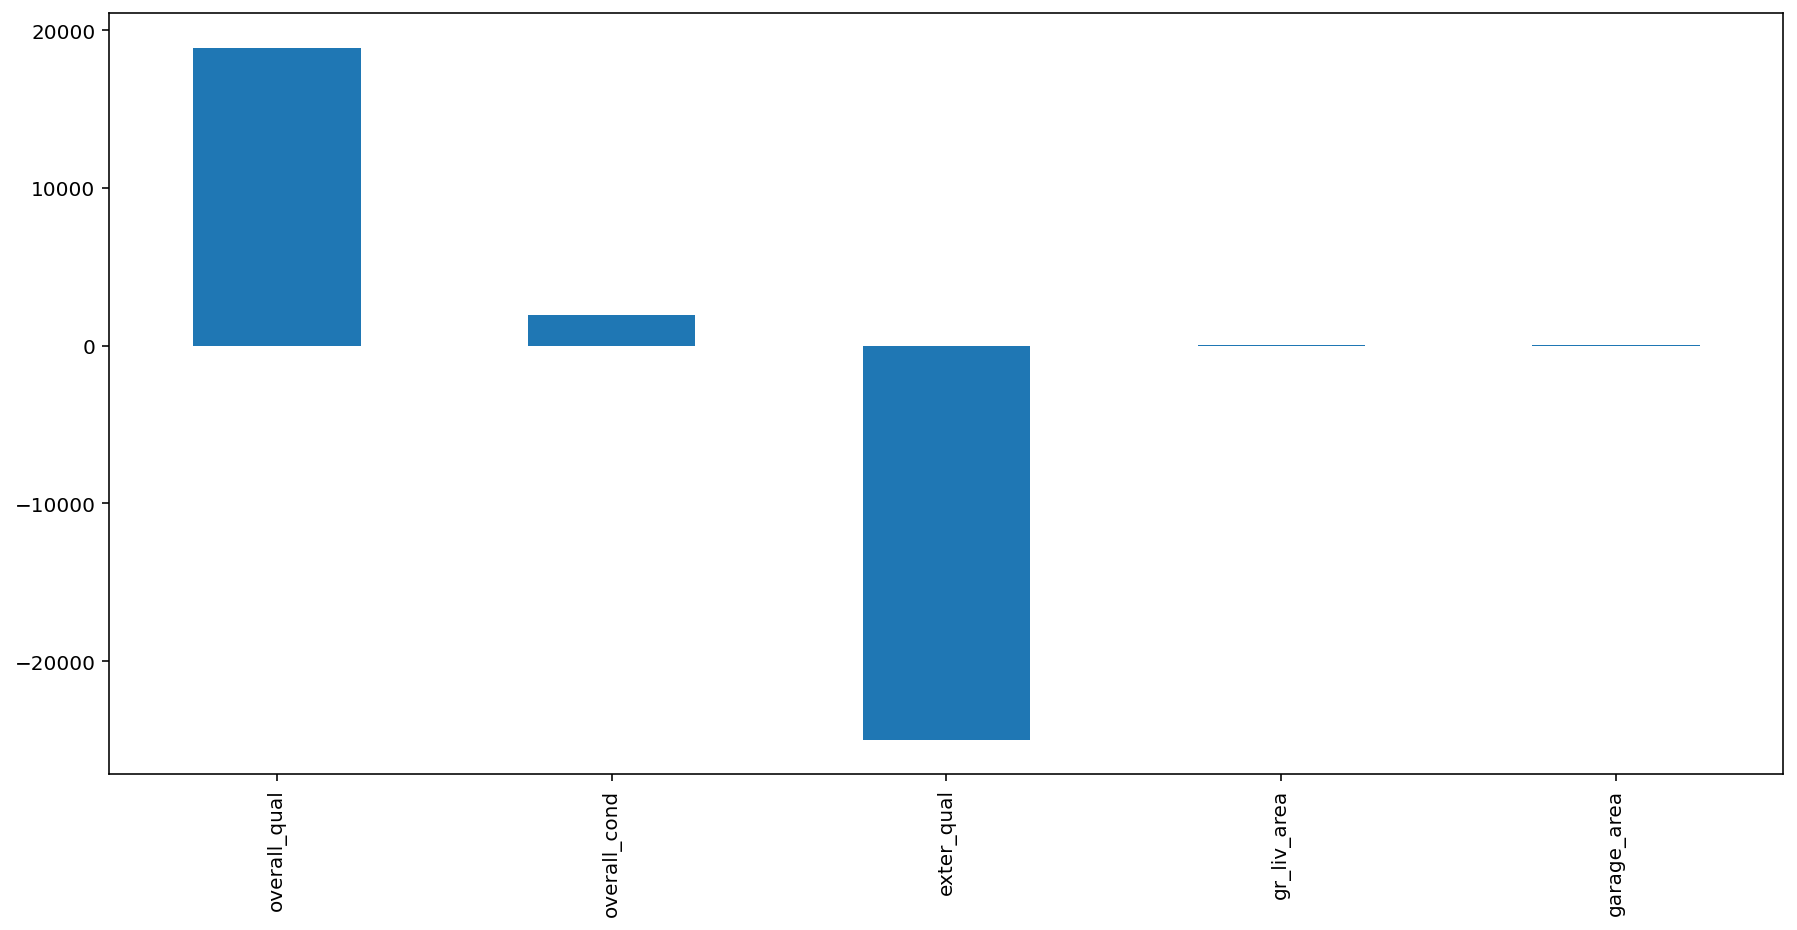

In [38]:
pd.Series(ridge.coef_, index=features).plot.bar(figsize=(15, 7))

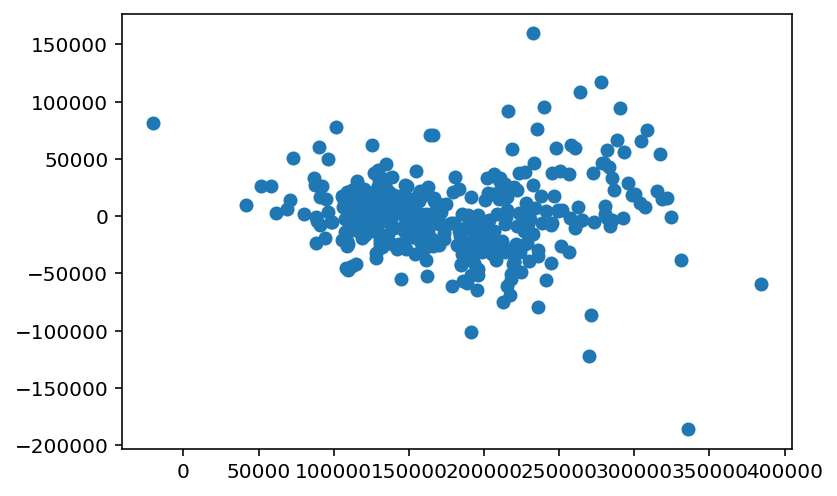

In [39]:
plt.scatter(pred, residuals)

In [40]:
ridge_df = pd.DataFrame([ridge.coef_, features], index = ['Coefficients', 'Features']).T
ridge_df = ridge_df.set_index('Features')
ridge_df['Coefficients'] = np.abs(ridge_df['Coefficients'])
ridge_df = ridge_df.sort_values(by='Coefficients',ascending=False)
ridge_df.head(10)

,Coefficients
Features,
exter_qual,24981.8
overall_qual,18864.2
overall_cond,1944.44
garage_area,65.9189
gr_liv_area,46.3428


Text(0.5, 0, 'Strenth of Predictor')

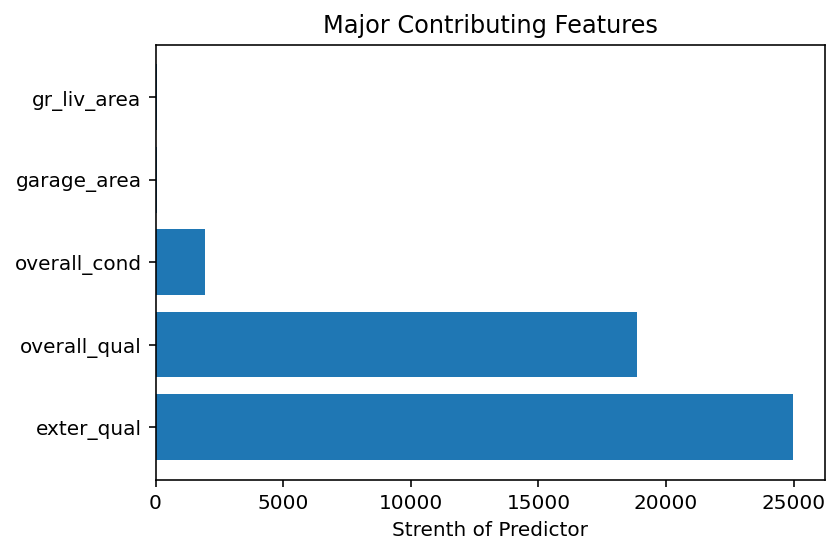

In [41]:
plt.barh(y=ridge_df.index[:10], width=ridge_df['Coefficients'][0:10]);
plt.title('Major Contributing Features')
plt.xlabel('Strenth of Predictor')

In [42]:
pred = ridge.predict(X_test)
residuals = y_test - pred
residuals[:5]  #look at the first fiveID

1838     17977.937341
179     -21155.474085
122    -185850.985929
1179     -4948.430144
1140     -3917.884522
Name: saleprice, dtype: float64

Text(0.5, 1.0, 'Distribution of Residuals')

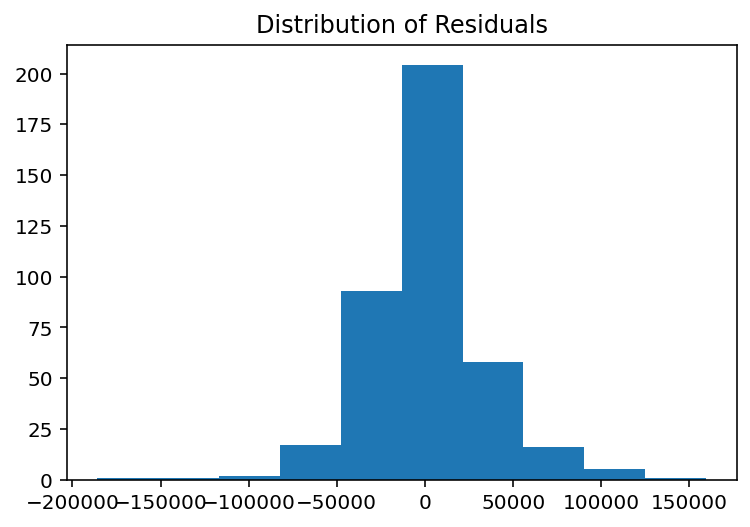

In [43]:
plt.hist(residuals);
plt.title('Distribution of Residuals')

In [44]:
sample_prices = y_test.values[0]
np.log(sample_prices)

12.066810578196666

Text(0.5, 1.0, 'Transformed Residuals')

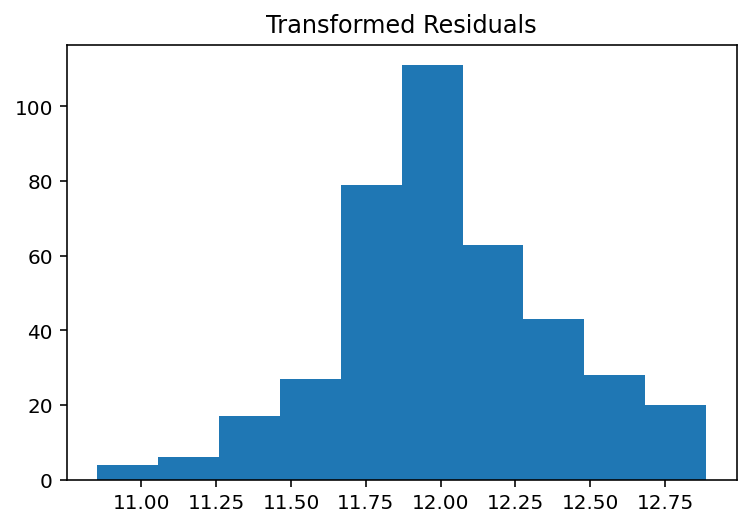

In [45]:
plt.hist(np.log(y_test));
plt.title('Transformed Residuals')

Text(0.5, 1.0, 'Comparing Predicted Prices with Residuals')

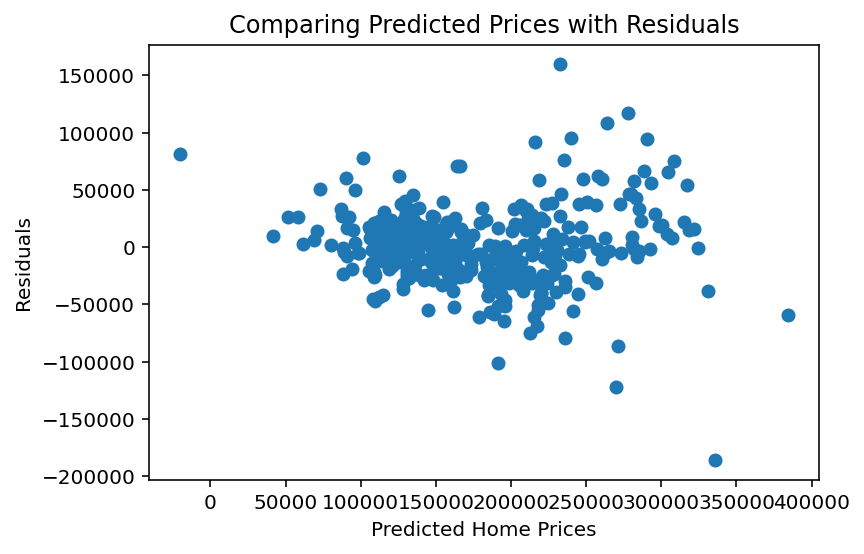

In [46]:
#interdcept 182000
#slope for quality is 19500
plt.scatter(x=pred,y=residuals)
plt.xlabel('Predicted Home Prices')
plt.ylabel('Residuals')
plt.title('Comparing Predicted Prices with Residuals')

# Now with Test data #

In [47]:
s_test.shape

(878, 81)

In [48]:
X_test_data.head()

,overall_qual,overall_cond,exter_qual,gr_liv_area,garage_area
0,6,8,3,1928,440
1,5,4,3,1967,580
2,7,5,2,1496,426
3,5,6,2,968,480
4,6,5,3,1394,514


In [49]:
X_test_data.corr(),s_train['saleprice'].sort_values()

(              overall_qual  overall_cond  exter_qual  gr_liv_area  garage_area
 overall_qual      1.000000     -0.122401   -0.716261     0.576049     0.560325
 overall_cond     -0.122401      1.000000    0.141667    -0.127846    -0.189795
 exter_qual       -0.716261      0.141667    1.000000    -0.417955    -0.468628
 gr_liv_area       0.576049     -0.127846   -0.417955     1.000000     0.469054
 garage_area       0.560325     -0.189795   -0.468628     0.469054     1.000000,
 398      50138
 1947     51689
 1332     52000
 1890     52500
 679      55000
          ...  
 1700    392500
 1980    394617
 1713    395000
 1760    395039
 1674    398800
 Name: saleprice, Length: 1986, dtype: int64)

In [50]:
test_pred = ridge.predict(X_test_data)

In [51]:
test_pred[:10]

array([188964.75770627, 173358.80023941, 206034.5189198 , 149341.11500435,
       163262.36178016,  98453.3196975 ,  99949.87766266, 125177.07579311,
       225240.4591556 , 157174.69870498])

In [52]:
s_test['saleprice'] = test_pred

In [53]:
s_test.head()

,Unnamed: 0,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,1,...,0,0,NaN,NaN,NaN,0,4,2006,WD,188964.757706
1,1,2718,905108090,90,RL,0.0,9662,Pave,NaN,2,...,0,0,NaN,NaN,NaN,0,8,2006,WD,173358.800239
2,2,2414,528218130,60,RL,58.0,17104,Pave,NaN,2,...,0,0,NaN,NaN,NaN,0,9,2006,New,206034.518920
3,3,1989,902207150,30,RM,60.0,8520,Pave,NaN,1,...,0,0,NaN,NaN,NaN,0,7,2007,WD,149341.115004
4,4,625,535105100,20,RL,0.0,9500,Pave,NaN,2,...,185,0,NaN,NaN,NaN,0,7,2009,WD,163262.361780


In [54]:
y_test_data = s_test['saleprice']

In [55]:
# Scale test set
X_td_scaled = sc.transform(X_test_data)
# y_td_scaled = sc.transform(y_test_data)

In [56]:
X_td_scaled.shape

(878, 5)

In [57]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100)).fit(X_td_scaled, y_test_data)
ridge

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [58]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
ridge_scores.mean()

0.8014700184667937

In [59]:
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [60]:
ridge.score(X_train, y_train)

0.8036564060593606

In [61]:
ridge.score(X_test, y_test)

0.7595152309062393

In [62]:
ridge.score(X_td_scaled, y_test_data)

-5.729887163767398

In [63]:
s_test.columns

Index(['Unnamed: 0', 'id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage',
       'lot_area', 'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_b

In [64]:
s_test.rename(columns={'id': 'ID', 'saleprice': 'SalePrice'}, errors="raise", inplace=True)

In [65]:
submission = s_test[['ID', 'SalePrice']]

In [66]:
submission.to_csv('datasets/submission_3.csv', index=False)